In [ ]:
"""
I-Nergy | AI Assets - Synthetic Dataset Creation

=================================

__author__: RM
__reviewer__: VB
__month__: 09/2022

2022 MIPU - Open source code

"""

In [1]:
#Data analysis
import pdb
import pandas as pd
import os
import matplotlib.pyplot as plt    
import pickle 
import numpy as np
from datetime import datetime, date, timedelta

#Modeling
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

#General
from os import walk
from joblib import dump, load



In [2]:
def mipu_colors(N):
    all_colors=['#16679C','#00B398','#C9609F','#FF7F50','#219AE9','#BDD48D','#EE6F90','#FFBD69']
    color=all_colors[N]
    return(color)
all_colors=['#16679C','#00B398','#C9609F','#FF7F50','#219AE9','#BDD48D','#EE6F90','#FFBD69']


In [3]:
df = pd.read_csv('Temps.csv')
df.set_index('time', inplace = True)
df.head()


,Temperature_B,Temperature_D,Temperature_A,Temperature_C,hour
time,,,,,
2022-08-09 13:00:00,99,95,91,90,13
2022-08-09 13:05:00,99,96,91,90,13
2022-08-09 13:10:00,99,96,91,91,13
2022-08-09 13:15:00,94,97,92,84,13
2022-08-09 13:20:00,97,96,92,88,13


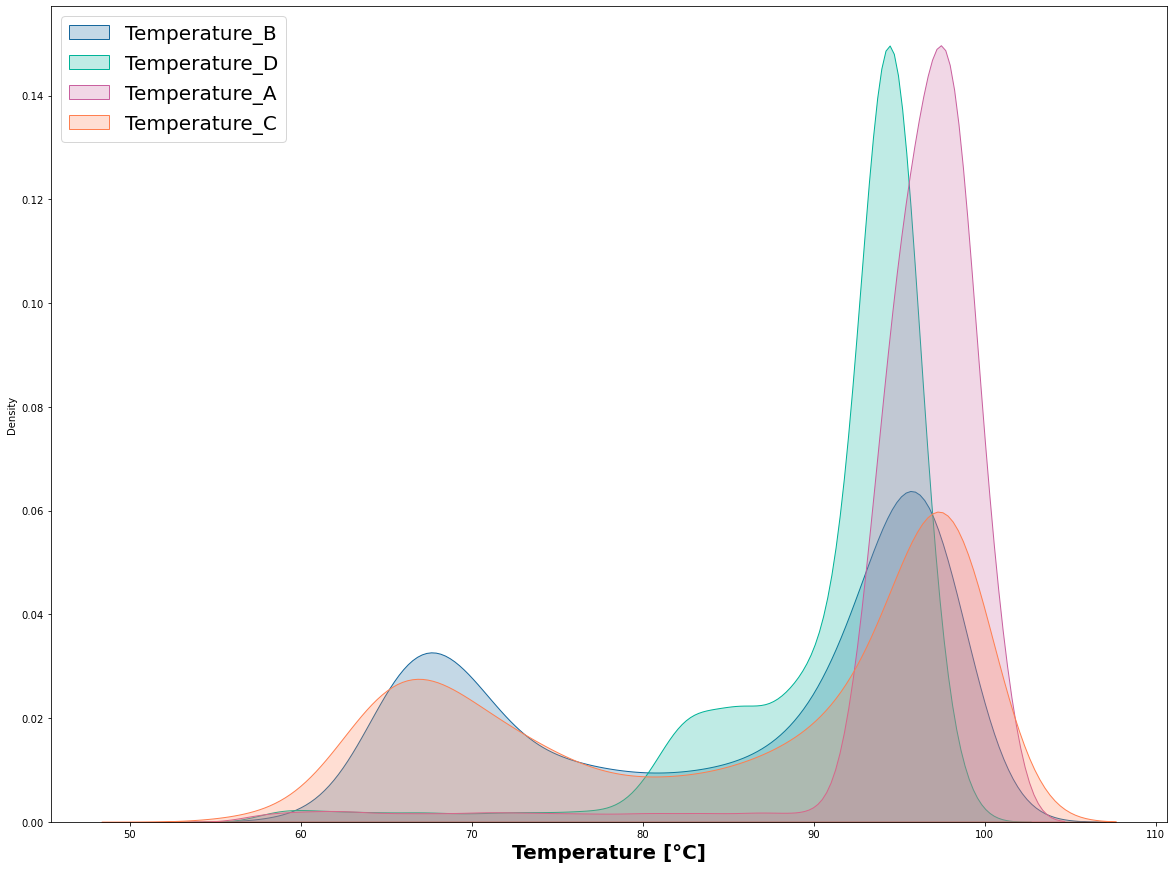

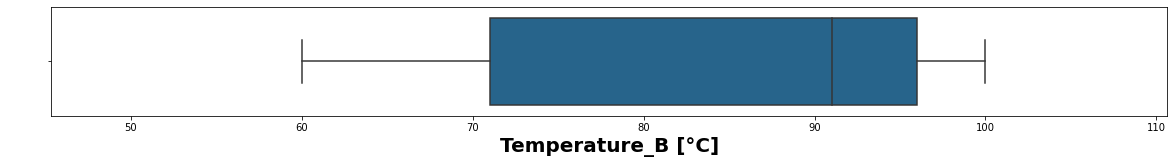

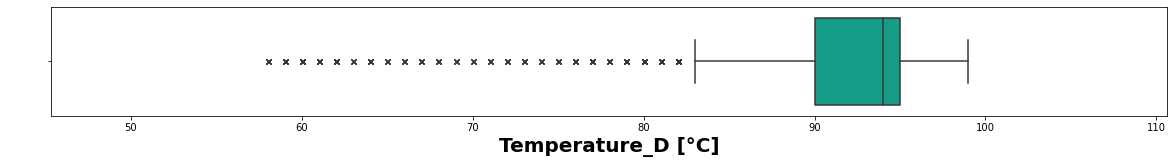

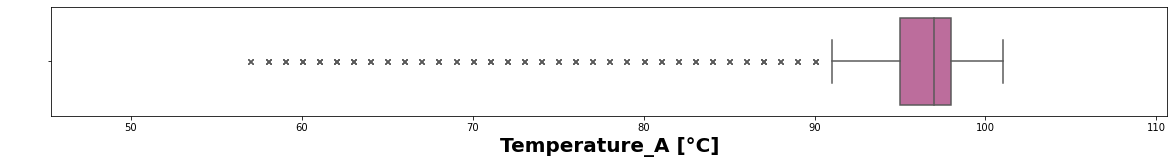

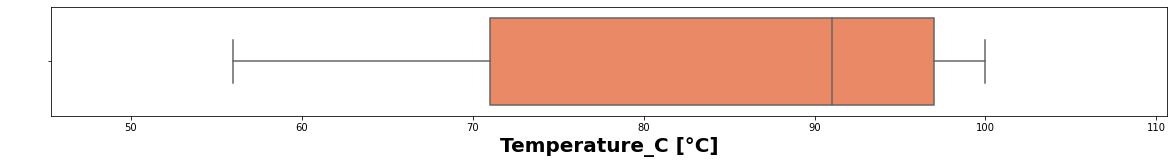

In [5]:

d = 1
for i,col in enumerate(df.iloc[:,:-1]):
    plt.figure(0,figsize=(20,15))
    density = sns.kdeplot(x = df[col], shade = True, color = all_colors[i], label = col)
    plt.legend( loc = 'upper left', fontsize = 20)
    plt.xlabel('Temperature [°C]', fontsize = 20, fontweight = 'bold')

for i,col in enumerate(df.iloc[:,:-1]):
    plt.figure(d, figsize = (20, 2))
    plt.xlim(density.get_xlim())
    plt.ylabel(' \n \n')
    sns.boxplot(data = df, x = df[col], color = all_colors[i], flierprops={"marker": "x"}) 
    plt.xlabel(f'{col} [°C]', fontsize = 20, fontweight = 'bold')   
    d += 1



In [6]:
# it is noted that Temperatures B and C have a very similar distribution between them.
# for Temperatures A and D there is always a certain degree of similarity but less

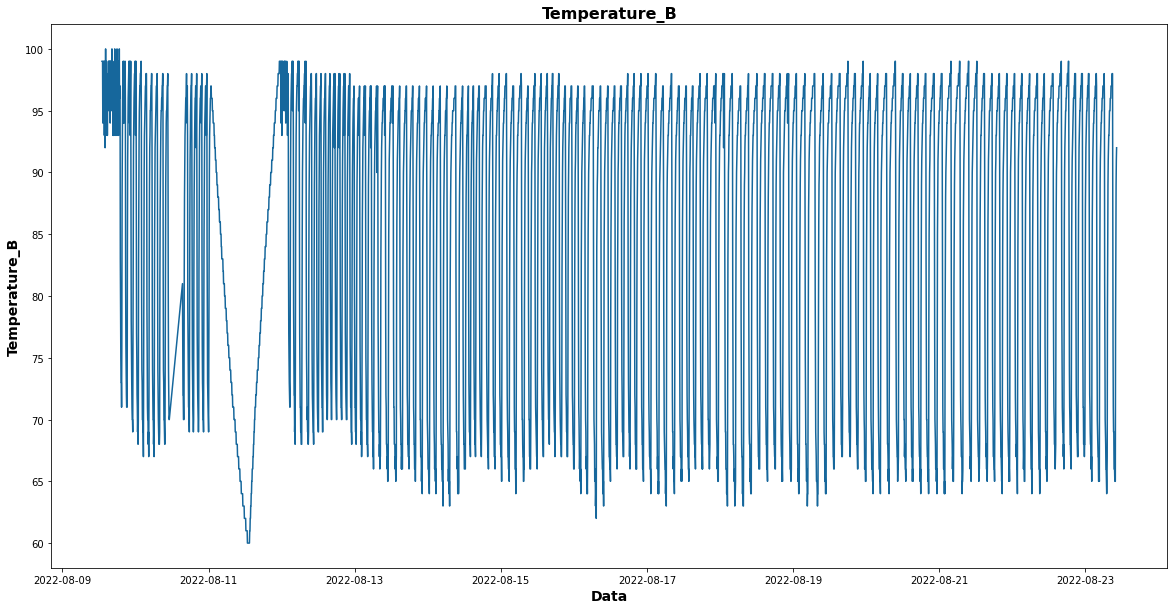

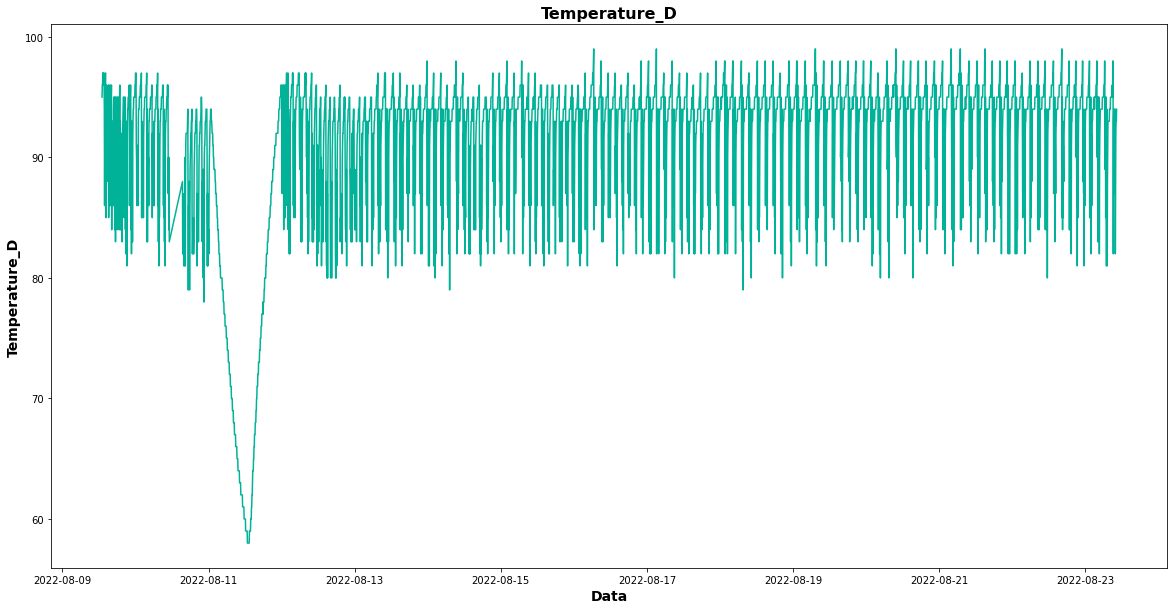

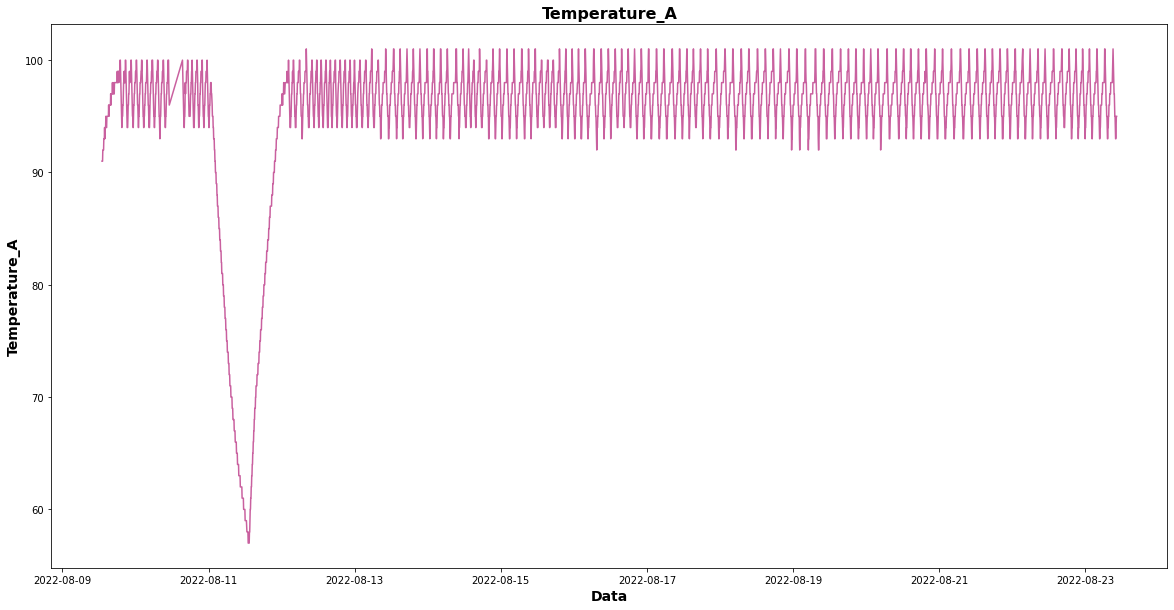

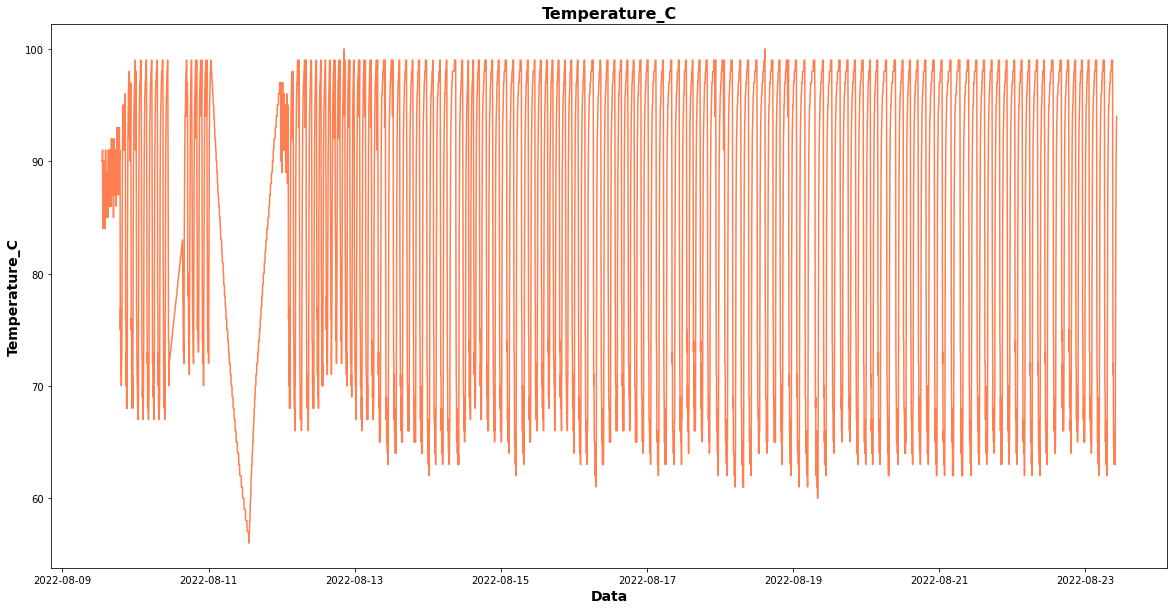

In [7]:

df.index = pd.to_datetime(df.index)
d=0
for i,col in enumerate(df.iloc[:,:-1]):
    x = df.index
    y = df[col]
    plt.figure(d, figsize = (20,10))
    plt.title(col,fontsize = 16, fontweight = "bold")
    plt.xlabel('Data',fontsize = 14, fontweight = "bold")
    plt.ylabel(col,fontsize = 14, fontweight = "bold")
    plt.plot(x,y, all_colors[i])
    d += 1

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Temperature_B'),
  Text(1.5, 0, 'Temperature_D'),
  Text(2.5, 0, 'Temperature_A'),
  Text(3.5, 0, 'Temperature_C'),
  Text(4.5, 0, 'hour')])

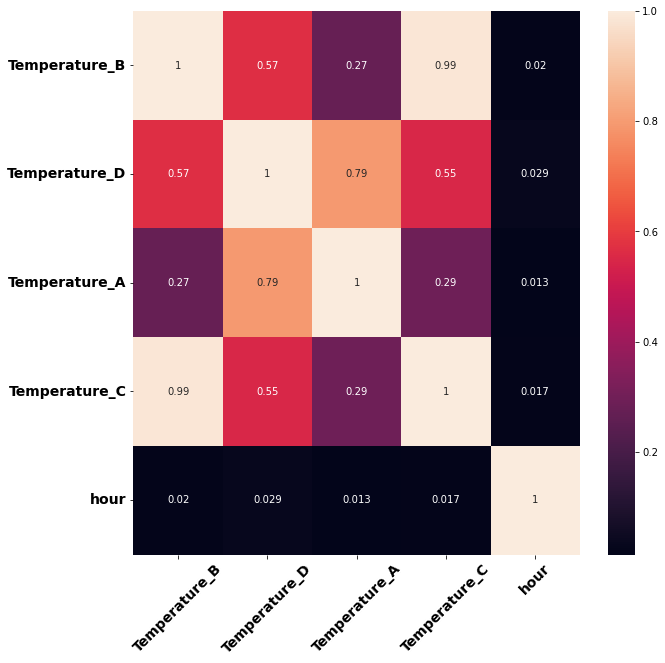

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), annot = True)
plt.yticks(fontsize = 14, fontweight = "bold", rotation = 0)
plt.xticks(fontsize = 14, fontweight = "bold", rotation = 45)

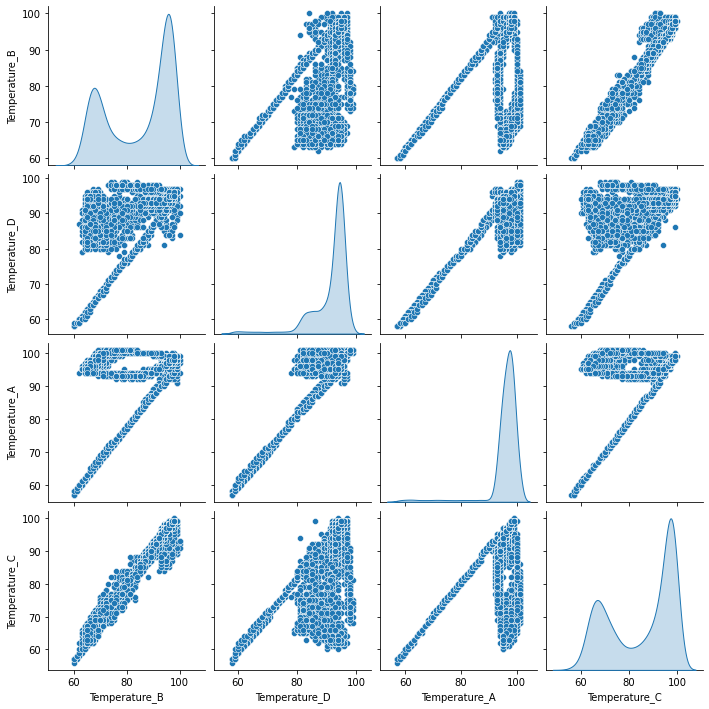

In [10]:
sns.pairplot(df[df.columns[:-1]],diag_kind = 'kde')

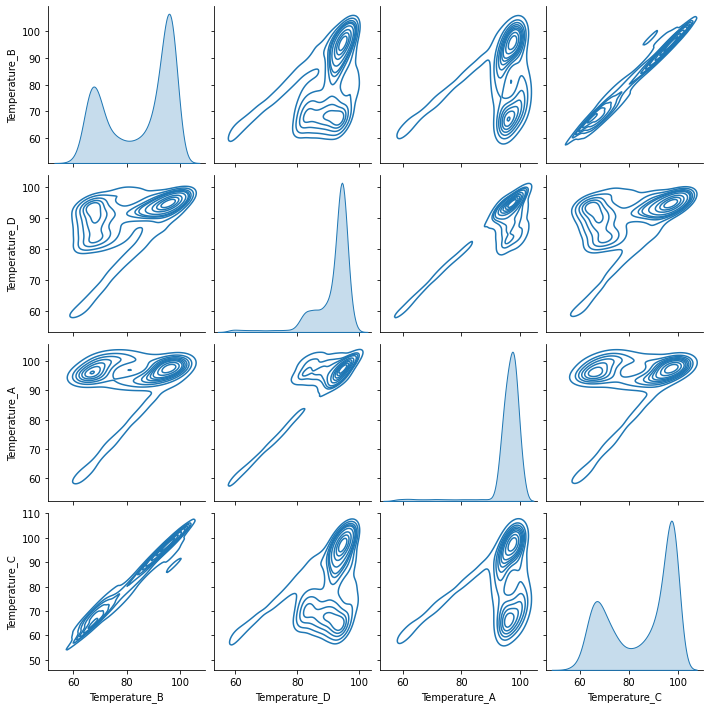

In [11]:
sns.pairplot(df[df.columns[:-1]],kind = 'kde')

In [12]:
# There is a strong linear correlation between Temperatures B and C.
# the linear correlation between A and D is decreased due to the presence of a cluster of points
# outside the interpolating line.

# between the Temperature C and the Temperature D there is a correlation of 55%, and decreases to 29% between C and A.
# between Temperature B and Temperature D there is a correlation of 57%, and decreases to 27% between B and A.

# Temperature A correlates only with D.
# The Temperature D is correlated with A, and more weakly with both B and C
# Temperatures B and C are strongly correlated with each other, on average with D and weakly with A

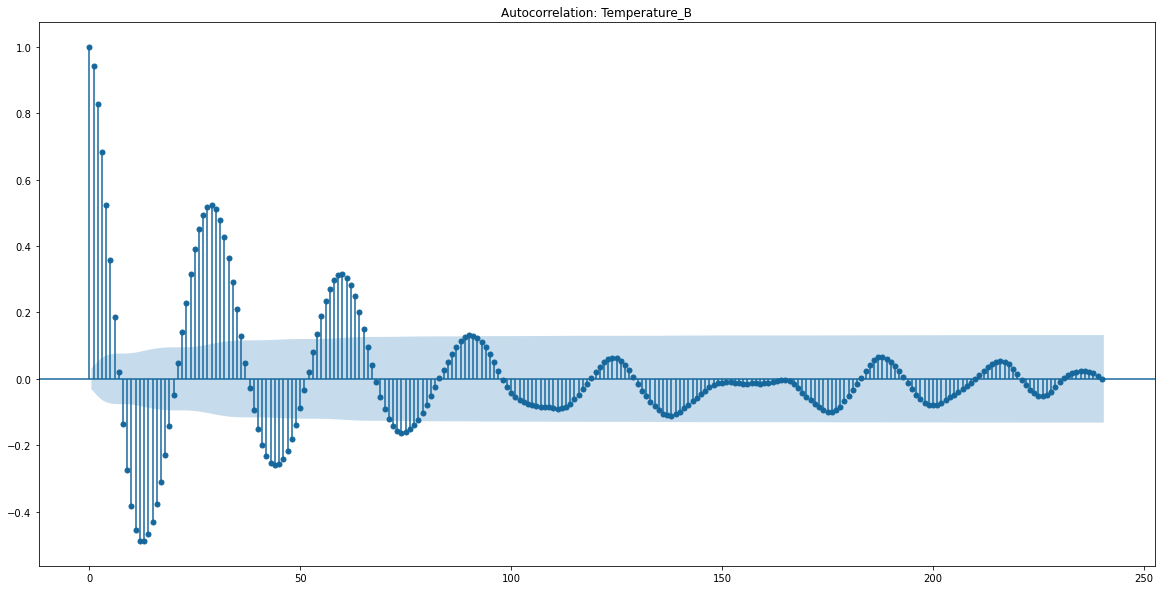

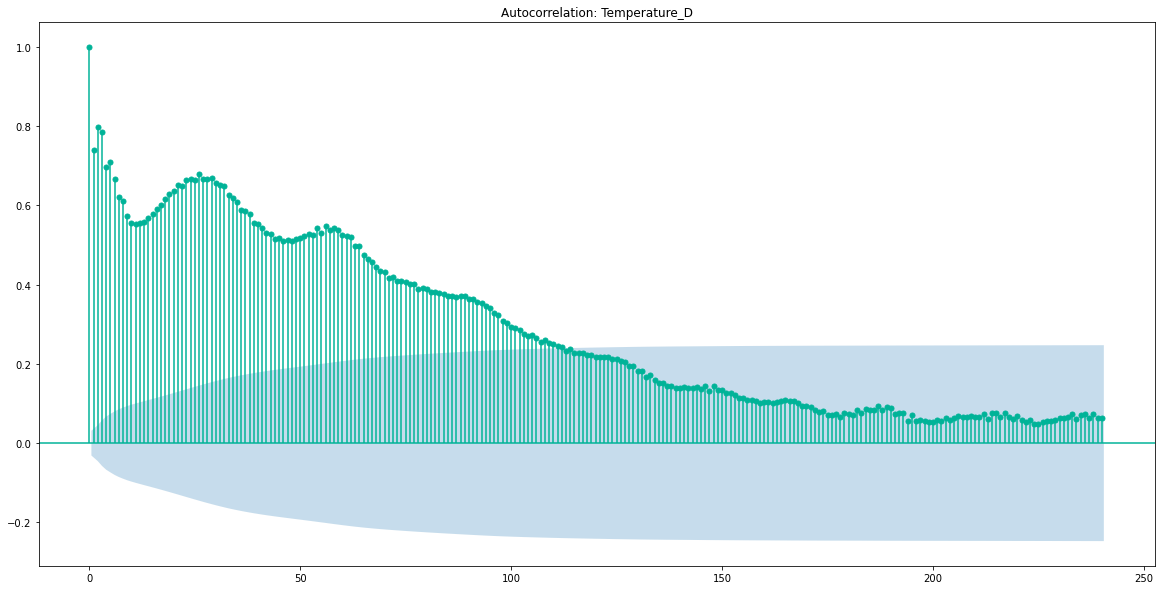

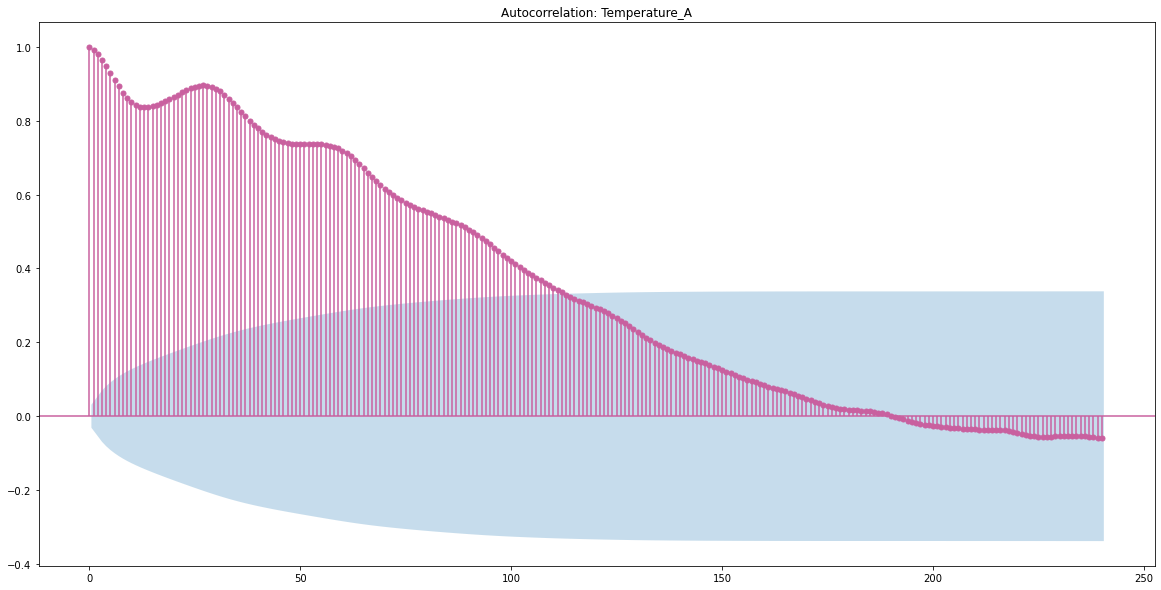

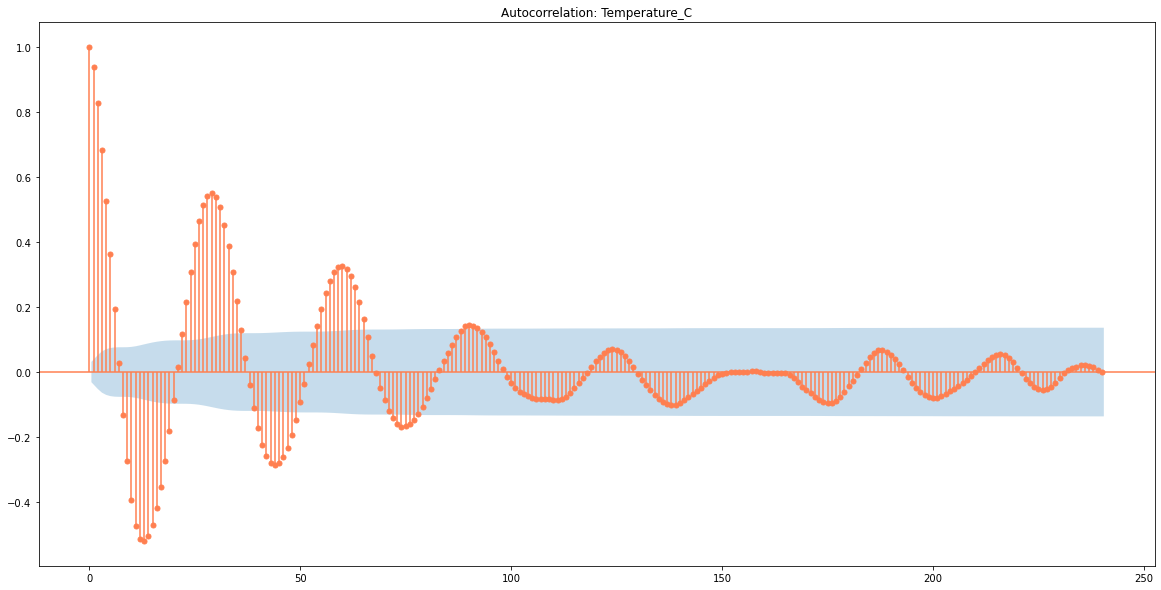

In [13]:
# Autocorrelation

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib as mpl
d = 0
for i,col in enumerate(df.iloc[:,:-1]):
    x = df.index
    y = df[col]
    with mpl.rc_context():
        mpl.rc("figure", figsize=(20,10))
        sm.graphics.tsa.plot_acf(df[col].values.squeeze(), lags=4*60,  color=all_colors[i], vlines_kwargs={"colors": all_colors[i]},  title = f'Autocorrelation: {col}')
    d += 1

    

In [14]:
# Temperature A exhibits a strong autocorrelation. Even less the autocorrelation of D
# the autocorrelation is oscillating, tending to zero for B and C. which means that each of them is independent from itself of the past
# and therefore the stochastic part prevails.
# Regarding Temperatures A and D, we notice a decreasing trend, so we can conclude that both variables have a dependency on themselves in the past.